Reflections:

At the end of the project i had gotten a correlation of -0.35, this analysis (albeit simple) implies that whilst the Net figure (of supply and demand estimates ) rises, the basis is expected to fall , vice versa, this inverse relationship is due to the fact that an increase in the the net figure is indicative of a rise in supply or a fall in the demand, or both, and any of these possibilities would result in a fall in the local crude oil price ( as represented by the spot prices i had used prior. )

Due to the nature of an exchange's standardisation of contracts, and activity in the international market, would be subject to less whipsaws due to local price drivers. Hence the basis would decrease, as the local prices fall to a larger extent than the futures price.

the correlation, although weak, is not surprising as there are many other factors which have the ability to affect futures and local prices and hence the basis, including geopolitics, economic/fiscal/central bank policies and even economic indicators and other markets such as the currency market, however that would be achieved later on as i progress and improve on my python capabilities

There are many opportunities to further the project such as incorporating multiple price drivers such as inflation rates, interest rates, and even transport costs, however some drivers i would not be able to analyse due to data limitations.

Upon completion of the project, i have familiarised myself with a select few libraries more than i had expected, especially pandas, and others include matplotlib. It also forced me to learn how to utilise APIs, and to work around limitations such as data output limits.


In [6]:
import pandas as pd 
import requests
import json
import re
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np


I proceeded to create a reusable API function, specific to the EIA.gov website

In [7]:
#RETRIEVING INFO FROM API: Creating A Reusable Function

def main():
    #Ask for Full EIA API Link From User:

    insertlink = input("API's link?")

    def get_valid_API_URL():

        validpattern = f"^https://api.eia.gov.*&offset=0&length=5000$"
        if re.match(validpattern,insertlink):
            print("Valid API URL 😁👍")
        else:
            print("Error, Please Re-Enter A Valid API URL 😩")
    
    get_valid_API_URL()
    
    

    #Def function to make API call
    #Filters are included in the link EIA provided, make offset variable
    def get_api(offset):
        api_key ="PasteAPIKeyHere"

        #Assign variables to result of split
        sublink1, sublink2 = insertlink.split("&offset=0")

        #use f format if intending on referencing a variable
        base_url =f"{sublink1}&offset={offset}&length=5000"+"&api_key="

        #Combine URLs with API Key
        complete_url = base_url+api_key

        #Use requests to call API
        response = requests.get(complete_url)
        return response

    #By deafult, offset starts at 0..
    offset = 0

    #check if API call was successful

    if get_api(offset).status_code == 200:
        print("Successful API Call!! 🎉🎉")
    else:
        print("Unsuccessful API Call ✖️")

    #make list to add each separate call to, due to the limitation of 
    #max 5000 rows of data set by EIA
    list_to_add_to = []
    return_ = get_api(offset).json()


    #Calculate the total rows for the current API call
    total_rows_for_specific_url = int(return_["response"]["total"])
    print(f"Total rows to retrieve for entire API: {total_rows_for_specific_url}")

    while offset < total_rows_for_specific_url:
        response = get_api(offset).json()
        #Extract all of the dictionaries within the data list.
        data = response["response"]["data"]
        
        #Add fetched data to the list
        list_to_add_to.extend(data)
        
        #Display how many rows of data were fetched 
        print(f"Rows just fetched : {len(data)}")
        
        #Display how many rows of data were fetched thus far
        print(f"Total number of rows thus far : {len(list_to_add_to)}")

        #Set offset to the new row to begin with
        offset = len(list_to_add_to)
        if len(data) == 0 :
            print("No more data to fetch")
            break
    #Convert finalised list of data into Pandas dataframe:
    df = pd.DataFrame(list_to_add_to)
    return df


I then proceeded to use the function i had created to obtain spot prices from the EIA website, before splitting it up into 2 dataframes, each to contain one of the 2 oil benchmarks, WTI and Brent.

In [8]:
#Define offset as 0 to reset its value
offset = 0

#Apply reusable function to various links: Weekly PET Spot Prices

df_spotprices = main()

#Clean dataframe and keep necessary columns only
df_spotprices = df_spotprices[["period","product-name","series-description","value","units"]]

#Split dataframe into Brent and WTI individually
#Sort the dates in chronological order, then reset the index
df_brentspot = df_spotprices[df_spotprices["product-name"] == "UK Brent Crude Oil"].sort_values(["period"]).reset_index().drop("index",axis=1)
pd.to_numeric(df_brentspot["value"], errors = "coerce")
df_brentspot = df_brentspot.dropna()

df_WTIspot = df_spotprices[df_spotprices["product-name"] == "WTI Crude Oil"].sort_values(["period"]).reset_index().drop("index",axis=1)
pd.to_numeric(df_WTIspot["value"], errors = "coerce")
df_WTIspot = df_WTIspot.dropna()

df_brentspot
#Save dataframe to CSV file ( If Necessary )
#df_spotprices.to_csv("PythonProcessed_Weekly_Petroleum_SpotPrices.csv")

Valid API URL 😁👍
Successful API Call!! 🎉🎉
Total rows to retrieve for entire API: 12626
Rows just fetched : 5000
Total number of rows thus far : 5000
Rows just fetched : 5000
Total number of rows thus far : 10000
Rows just fetched : 2626
Total number of rows thus far : 12626


,period,product-name,series-description,value,units
0,2000-01-04,UK Brent Crude Oil,Europe Brent Spot Price FOB (Dollars per Barrel),23.95,$/BBL
1,2000-01-05,UK Brent Crude Oil,Europe Brent Spot Price FOB (Dollars per Barrel),23.72,$/BBL
2,2000-01-06,UK Brent Crude Oil,Europe Brent Spot Price FOB (Dollars per Barrel),23.55,$/BBL
3,2000-01-07,UK Brent Crude Oil,Europe Brent Spot Price FOB (Dollars per Barrel),23.35,$/BBL
4,2000-01-10,UK Brent Crude Oil,Europe Brent Spot Price FOB (Dollars per Barrel),22.77,$/BBL
...,...,...,...,...,...
6344,2024-12-27,UK Brent Crude Oil,Europe Brent Spot Price FOB (Dollars per Barrel),73.77,$/BBL
6345,2024-12-30,UK Brent Crude Oil,Europe Brent Spot Price FOB (Dollars per Barrel),74.24,$/BBL
6346,2024-12-31,UK Brent Crude Oil,Europe Brent Spot Price FOB (Dollars per Barrel),74.58,$/BBL
6347,2025-01-02,UK Brent Crude Oil,Europe Brent Spot Price FOB (Dollars per Barrel),76.14,$/BBL


I proceeded to graph the spot prices which i had obtained, and include the Effective Funds Rate, hoping to find a correlation, but to no avail, it was possibly because of the time lag after the implementation of the monetary policy objectives and targets. Which i felt was out of my focus for this project, which was to familarise myself with more basic functions first.

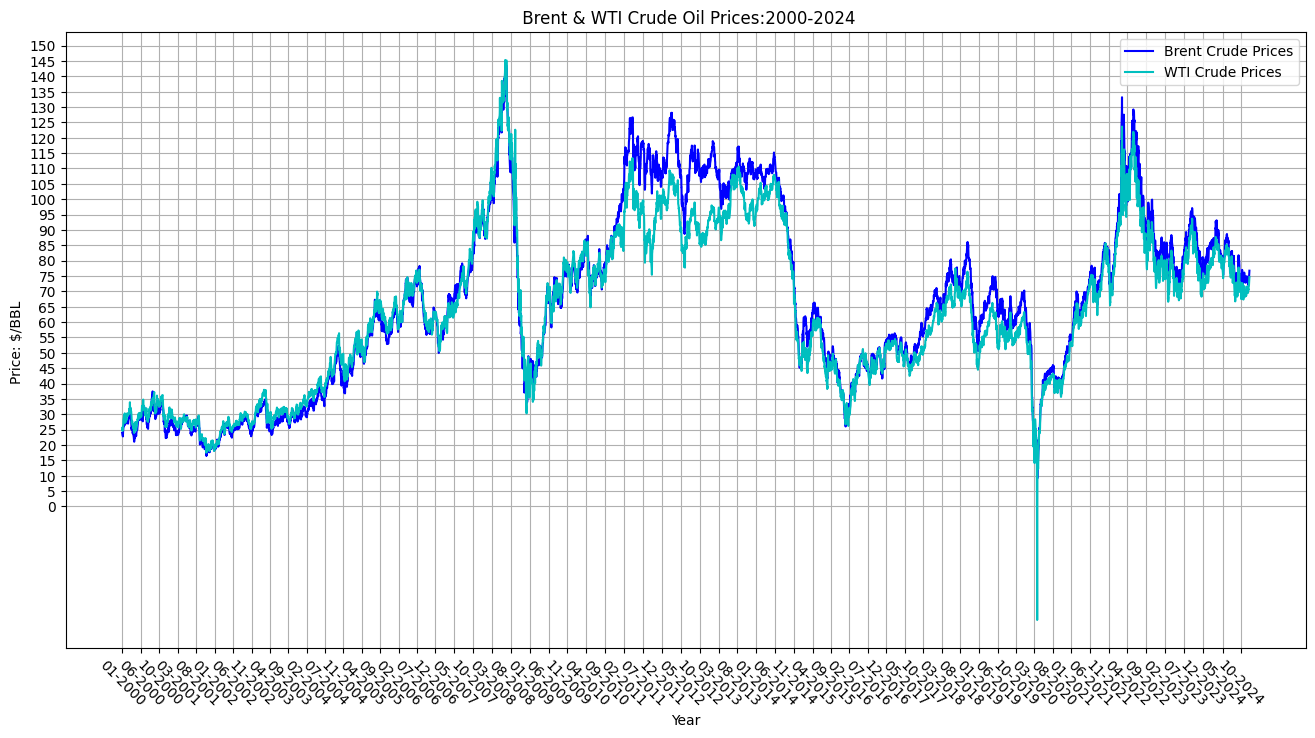

In [9]:

#X Points :
#Change Datatype

brentxpoints= pd.to_datetime(df_brentspot["period"], format = "%Y-%m-%d")

#Y Points:
#Change Datatype
brentypoints = pd.to_numeric(df_brentspot["value"], errors="coerce").tolist()

plt.figure(figsize=(16,8))
plt.plot(brentxpoints,brentypoints,"b-", label = "Brent Crude Prices")
plt.title(" Brent & WTI Crude Oil Prices:2000-2024")
plt.xlabel("Year")
plt.ylabel("Price: $/BBL ")
plt.xticks(brentxpoints[::105],[date.strftime("%m-%Y") for date in brentxpoints[::105]],rotation = -45)
yticks = list(range(0,155,5))
plt.yticks(yticks)

WTIxpoints = pd.to_datetime(df_WTIspot["period"], format ="%Y-%m-%d")
WTIypoints = pd.to_numeric(df_WTIspot["value"]).tolist()

plt.plot(WTIxpoints,WTIypoints,"c-",label = "WTI Crude Prices")


plt.legend()
plt.grid()


plt.show()




Success!


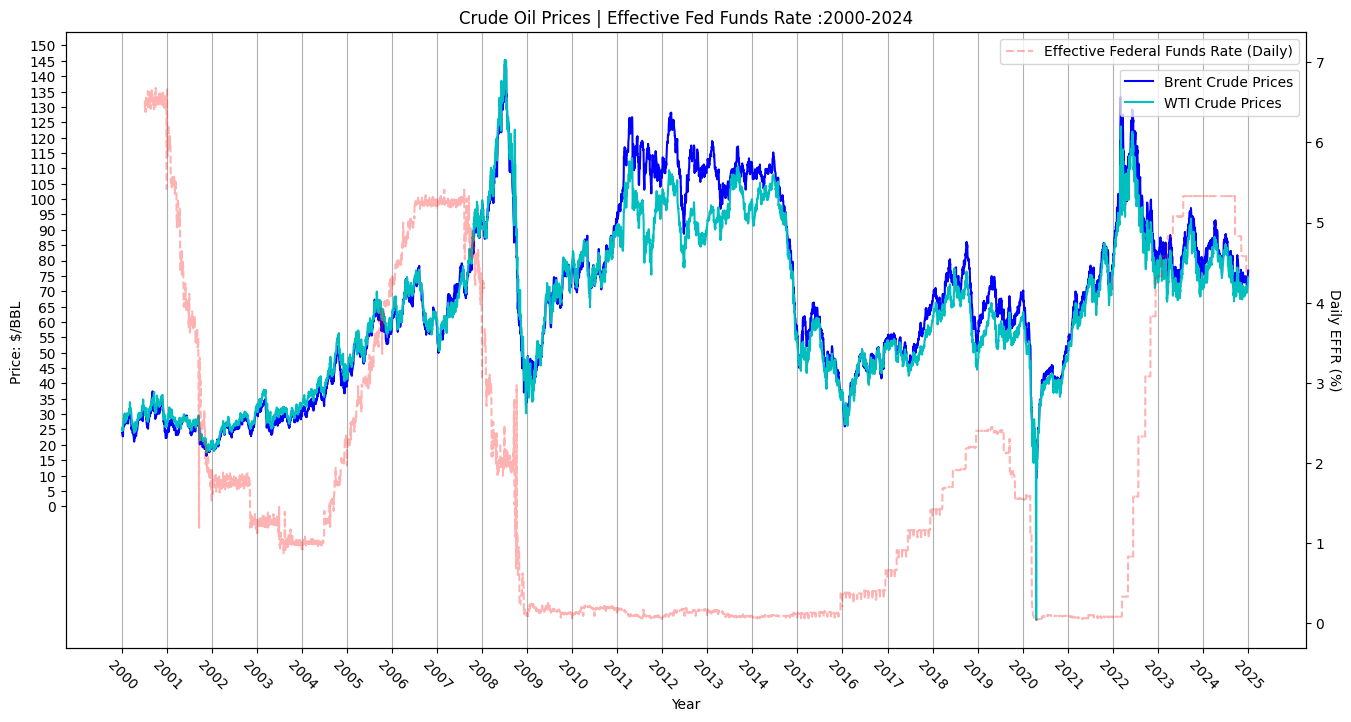

In [ ]:
def fred_api():
    api_key = "PasteAPIKeyHere"
    url = f"https://api.stlouisfed.org/fred/series/observations?series_id={series_id}&api_key={api_key}&file_type=json"
    response = requests.get(url)
    return response 

#specify the series code you would like to obtain, by referencing the website
series_id = "EFFR"

#check that the request was valid
if fred_api().status_code == 200:
    print("Success!")
else:
    print("Error in getting API")

#call the function fred_api() and interpret it using .json()
response = fred_api().json()

#Extract the data from the response, convert to dataframe and retain columns needed.
observations = response["observations"]
df_EFFR = pd.DataFrame(data=observations)[["date","value"]].sort_values(["date"])

#change the datatypes of the retrieved data so we can input it for a graph
effr_x = pd.to_datetime(df_EFFR["date"])
effr_y = pd.to_numeric(df_EFFR["value"],errors="coerce")



#copy and paste previous graph 
plt.figure(figsize=(16,8))
plt.plot(brentxpoints,brentypoints,"b-", label = "Brent Crude Prices")
plt.title("Crude Oil Prices | Effective Fed Funds Rate :2000-2024")
    #change the title
plt.xlabel("Year")
plt.ylabel("Price: $/BBL ")

#create list of datetime objects for x axis label
from datetime import datetime,date
currentyear= datetime.today().year
listoy = list(range(currentyear-25,currentyear+1))
list_ofdates = list(f"1/1/{_}" for _ in listoy)
#each label would be "1/1/year" to standardise axis
datetime_objects = [datetime.strptime(indivdate,"%d/%m/%Y") for indivdate in list_ofdates]

#use the list of datetime objects as labels for x axis
plt.xticks(ticks=datetime_objects,rotation = -45)

#generate list containing range of values you'd like
yticks = list(range(0,155,5))
plt.yticks(yticks)

#plot the "WTI Crude Oil Prices" graph on the same axes as the 
#"Brent Crude Oil Prices" graph
WTIxpoints = pd.to_datetime(df_WTIspot["period"], format ="%Y-%m-%d")
WTIypoints = pd.to_numeric(df_WTIspot["value"]).tolist()
plt.plot(WTIxpoints,WTIypoints,"c-",label = "WTI Crude Prices")
plt.grid(axis="x")
plt.legend(loc="upper right",bbox_to_anchor =(1,.95))

#plot the EFFR rate on the same X axes
ax2 = plt.gca().twinx()
ax2.plot(effr_x,effr_y, "r--", label = "Effective Federal Funds Rate (Daily)", alpha =0.3)
ax2.set_ylabel("Daily EFFR (%)", rotation =270, labelpad=12)
ax2.legend()




plt.show()



The graphs of the spot prices seemed to have shown that Brent and WTI crude oils are highly correlated for a majority of time, however during the periods of 2011 to mid 2014, there seemed to have been an anomaly to the trend , upon further research it was partly due to U.S. and Middle Eastern tensions which raised the market's expectations of the closure of the Suez Canal (Impacting trade flows between the Atlantic Ocean and Indian Ocean) and Strait of Hormuz (Impacting trade flows between the Persian Gulf and the rest of the oceans, significant as the Strait of Hormuz has the largest shipping activity for crude oil produced from the Middle East, the region which supplies a large proportion of oil used to meet global demand).

In either scenario, the cost of transportation of crude oil produced by countries surrounding the Northern Atlantic Ocean and by the Middle Eastern Countries who rely heavily on the Strait of Hormuz would rise significantly as much longer shipping routes such as the one passing the Cape of Good Hope are the only alternatives for larger ships. Hence this was reflected in the Brent Crude Oil prices, which is a benchmark for oil produced in these affected regions. Whilst WTI spot prices , which are more reflective of the United State's oil supply wasn't as significantly affected, hence the widened spread.

Another factor was that increased investment in the industry's infrastructure allowed for an increase in the production of WTI oil, along with a change in the federal government's trade policy, where control over WTI Crude Oil exports were made loose, all of which promoted increased supply of WTI oil and thus a widening disparity between the Brent and WTI spot prices.



I then proceeded to use the API function again, this time to collect Futures prices from the EIA website

In [11]:
#Define offset as 0 to reset its value
offset = 0 
#Create dataframe for basis calculations
futures_df = main()


Valid API URL 😁👍
Successful API Call!! 🎉🎉
Total rows to retrieve for entire API: 139713
Rows just fetched : 5000
Total number of rows thus far : 5000
Rows just fetched : 5000
Total number of rows thus far : 10000
Rows just fetched : 5000
Total number of rows thus far : 15000
Rows just fetched : 5000
Total number of rows thus far : 20000
Rows just fetched : 5000
Total number of rows thus far : 25000
Rows just fetched : 5000
Total number of rows thus far : 30000
Rows just fetched : 5000
Total number of rows thus far : 35000
Rows just fetched : 5000
Total number of rows thus far : 40000
Rows just fetched : 5000
Total number of rows thus far : 45000
Rows just fetched : 5000
Total number of rows thus far : 50000
Rows just fetched : 5000
Total number of rows thus far : 55000
Rows just fetched : 5000
Total number of rows thus far : 60000
Rows just fetched : 5000
Total number of rows thus far : 65000
Rows just fetched : 5000
Total number of rows thus far : 70000
Rows just fetched : 5000
Total 

In [12]:
#Convert to Dataframe
futures_df = pd.DataFrame(futures_df)

#Save if necessary, remove hashtag for the line of code below if you would like to save it.

futures_df = futures_df[["period","series-description","value","units"]].sort_values(["period"],ascending=True)
futures_df = futures_df.reset_index().drop(["index"],axis=1)

#Only retain the data for contract 4,  to calculate the basis (Used furthest contract for Supply and Demand Analysis Subsequently)
crude_futures_df = futures_df[futures_df["series-description"].str.contains("OK Crude Oil Future Contract 4")].reset_index().drop(["index"], axis =1)

#save crude oil futures dataframe as csv:
#crude_futures_df.to_csv("EIA_crude_futures_prices.csv")

crude_futures_df




,period,series-description,value,units
0,1985-01-02,"Cushing, OK Crude Oil Future Contract 4 (Dolla...",25.63,$/BBL
1,1985-01-03,"Cushing, OK Crude Oil Future Contract 4 (Dolla...",25.65,$/BBL
2,1985-01-04,"Cushing, OK Crude Oil Future Contract 4 (Dolla...",25.13,$/BBL
3,1985-01-07,"Cushing, OK Crude Oil Future Contract 4 (Dolla...",25.5,$/BBL
4,1985-01-08,"Cushing, OK Crude Oil Future Contract 4 (Dolla...",25.46,$/BBL
...,...,...,...,...
9867,2024-04-01,"Cushing, OK Crude Oil Future Contract 4 (Dolla...",81.12,$/BBL
9868,2024-04-02,"Cushing, OK Crude Oil Future Contract 4 (Dolla...",82.34,$/BBL
9869,2024-04-03,"Cushing, OK Crude Oil Future Contract 4 (Dolla...",82.88,$/BBL
9870,2024-04-04,"Cushing, OK Crude Oil Future Contract 4 (Dolla...",84.03,$/BBL


My next objective is to find the basis of crude oil, WTI Crude Oil to be specific as i only have access to the WTI spot prices and futures prices, and not that of Brent, neither do i have any mass amounts of data relating to other cash market and futures prices, therefore i would have to solely focus on WTI Crude Oil and perform analysis on it.

The Basis would be calculated on a daily basis, and in this case i had used the Crude Oil Future Contract 4, although i had initially no idea what the numbers meant, after some research Contract 4, the furthest contract seemed to me like a better metric to use for the calculation due to supply and demand factors usually having impacts in the long term.

In [13]:
#Change datatype in column to datetime 
crude_futures_df["period"] = pd.to_datetime(crude_futures_df["period"])
df_WTIspot["period"] =pd.to_datetime(df_WTIspot["period"])

#Merge dataframes of WTI and dataframes of Crude Futures, keep necessary columns and rename if necessary.
basis_df = crude_futures_df.merge(df_WTIspot, on ="period")[["period","value_x","value_y"]].rename(columns = {"value_x":"Futures Price (NYMEX)","value_y":"Spot/Cash Market Price (WTI)"})
basis_df = pd.DataFrame(basis_df)
#Daily basis figures: Cash market price - nearest futures price.
#convert datatypes of the futures and spot prices to numbers for calculations
basis_df["Futures Price (NYMEX)"] = pd.to_numeric(basis_df["Futures Price (NYMEX)"],errors="coerce")
basis_df["Spot/Cash Market Price (WTI)"] = pd.to_numeric(basis_df["Spot/Cash Market Price (WTI)"], errors="coerce")
basis_df["Basis"] = basis_df["Spot/Cash Market Price (WTI)"] - basis_df["Futures Price (NYMEX)"]
basis_df["period"] = pd.to_datetime(basis_df["period"])
basis_df


,period,Futures Price (NYMEX),Spot/Cash Market Price (WTI),Basis
0,2000-01-04,23.43,25.56,2.13
1,2000-01-05,22.99,24.65,1.66
2,2000-01-06,22.92,24.79,1.87
3,2000-01-07,22.75,24.79,2.04
4,2000-01-10,23.13,24.71,1.58
...,...,...,...,...
6067,2024-04-01,81.12,84.54,3.42
6068,2024-04-02,82.34,85.95,3.61
6069,2024-04-03,82.88,86.22,3.34
6070,2024-04-04,84.03,87.37,3.34


A positive basis indicates backwardation and thus a tight supply in the local cash market or strong demand, vice versa. To investigate this relationship, i would be analysing the supply and demand dynamics, due to the limitations in the data i could retrieve from EIA, i would have to make do with estimations using other types of data, inspired by CHATGPT.

Finally, i called the API function for the last time, this time it was to obtain the supply and demand ( or at least the substitutes ) figures from EIA

In [14]:
supp_disp_df = main()


Valid API URL 😁👍
Successful API Call!! 🎉🎉
Total rows to retrieve for entire API: 2625
Rows just fetched : 2625
Total number of rows thus far : 2625


In [19]:
#Ensure you are working with a pandas datafrmae to apply pandas specific functions
supp_disp_df = pd.DataFrame(supp_disp_df)
#retain the colums that are relevant only
supp_disp_df = supp_disp_df[["period","process-name","series-description","value","units"]]
#supp_disp_df.to_csv("Supply&Disposition.csv")

#create df for stock change data only so it can be used for supply and demand calculations 
#filters based on columns containing certain text to obtain the relevant data.
stockdf = supp_disp_df[supp_disp_df["process-name"].str.contains("Stock Change")].copy()
stockdf = pd.DataFrame(stockdf)
stockdf["value"]= pd.to_numeric(stockdf["value"], errors="coerce")
#Group by dates so that different categories of stocks , which are recorded within
#the same month, are added together.
stockdf1 = stockdf.groupby(["period"])["value"].sum().reset_index()
stockdf1 = pd.DataFrame(stockdf1)
stockdf1["value"] = pd.to_numeric(stockdf1["value"],errors="coerce")


#create df for demand estimation figures only
#demand is estimated as EXPORTS + U.S. Refinery and Blender Net Input of Crude Oil - STOCK CHANGE (CHATGPT)
newdemanddf = supp_disp_df[supp_disp_df["process-name"].str.contains("Exports|Refinery and Blender Net Input")].copy()
newdemanddf["value"] = pd.to_numeric(newdemanddf["value"], errors="coerce")
newdemanddf1 = newdemanddf.groupby(["period"])["value"].sum().reset_index()
newdemanddf1 = pd.DataFrame(newdemanddf1)
newdemanddf1["Estimated Demand"] = (newdemanddf1["value"] - stockdf1["value"])


#Supply is estimated as Field production + Imports - Exports - STOCK CHANGE (CHATGPT)
exportdf = supp_disp_df[supp_disp_df["process-name"].str.contains("Export")].copy()
exportdf["value"]= pd.to_numeric(exportdf["value"], errors="coerce")
exportdf = exportdf[["period","value"]]
exportdf = pd.DataFrame(exportdf).reset_index().drop(["index"],axis=1)

newsupplydf = supp_disp_df[supp_disp_df["process-name"].str.contains("Field Production|Imports")].copy()
newsupplydf["value"] = pd.to_numeric(newsupplydf["value"], errors="coerce")
newsupplydf = newsupplydf.groupby(["period"])["value"].sum().reset_index()
newsupplydf = pd.DataFrame(newsupplydf)
newsupplydf["Estimated Supply"] = newsupplydf["value"]-stockdf1["value"]-exportdf["value"]

#Create new dataframe specific to the net result of Supply - Demand
Net_df = newdemanddf1.merge(newsupplydf,on="period")
pd.DataFrame(Net_df)
Net_df["Net"] = Net_df["Estimated Supply"]-Net_df["Estimated Demand"]
#Clean and retain necessary colums only
Net_df = Net_df[["period","Net"]]

,period,value
0,2000-01,5450
1,2000-02,871
2,2000-03,4449
3,2000-04,3706
4,2000-05,1062
...,...,...
292,2024-05,127601
293,2024-06,126930
294,2024-07,129977
295,2024-08,121129


In [16]:
#Create new dataframe with basis, but in monthly intervals, start by formatting the
#date column as month year, to prepare for groupby().
month__ =basis_df["period"].dt.strftime("%m-%Y")
basis_monthly = basis_df.groupby(month__)["Basis"].mean()
basis_monthly= pd.DataFrame(basis_monthly).reset_index()
basis_monthly["period"] = pd.to_datetime(basis_monthly["period"], format="%m-%Y")
basis_monthly = basis_monthly.sort_values(["period"])

#Removing the bottom 5 rows and assigning this as a new dataframe
#This is to ensure a graph can be plotted if necessary (see bottom of cell)
Net_df_dropped = Net_df.drop(Net_df.tail(5).index)
Net_df_dropped["period"]= pd.to_datetime(Net_df_dropped["period"])

net_basis_merged_df = Net_df_dropped.merge(basis_monthly, on ="period")

#Find correlation using in-built pandas function.
net_basis_merged_df.corr()


#Optional Plot
# plt.figure(figsize=(16,12))
# fig, axs = plt.subplots(2,1,sharex= True)
# axs[0].plot(net_basis_merged_df["period"],net_basis_merged_df["Net"],"r-")
# axs[1].plot(net_basis_merged_df["period"],net_basis_merged_df["Basis"])
# axs[0].grid(axis= "x")
# axs[1].grid(axis= "x")
# plt.show()


,period,Net,Basis
period,1.000000,-0.797650,0.082857
Net,-0.797650,1.000000,-0.359505
Basis,0.082857,-0.359505,1.000000
